# __Laboratorio 3: Búsqueda informada (Parte 1)__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [22]:
expandidos_grafico = []

In [23]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds): 
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

        
    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""        
        raise NotImplementedError
        
    def result(self, node, action): 
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError
        
    def is_goal(self, node): 
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""      
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError 
     
    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)  


    def hNoAdmisible(self, node):
     raise NotImplementedError 
    
    def hAdmisible(self, node):
     raise NotImplementedError 

    def hConsistente(self, node):
     raise NotImplementedError 
     
    def hNegativa(self, node):
     raise NotImplementedError 

    def fnoAdmisible(self, node):
     return self.g(node) + self.hNoAdmisible(node) 

    def fAdmisible(self, node):
     return self.g(node) + self.hAdmisible(node) 

    def fConsistente(self, node):
     return self.g(node) + self.hConsistente(node)         

    def fNegativa(self, node):
     return self.g(node) + self.hNegativa(node)    

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [24]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
        return self.state  

## __Estructuras de datos - Cola de prioridad__

In [25]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)    
  

## __UCS__

In [26]:
# UCS
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs    

def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))

def UCS2(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            expandidos_grafico.append(len(closed))
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))

\## __VORAZ__

In [27]:
# VORAZ

def VORAZ(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.h(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))

def VORAZ2(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.h(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            expandidos_grafico.append(len(closed)) 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))

def VORAZadmisible(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.hAdmisible(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.hAdmisible(child))

def VORAZnoAdmisible(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.hNoAdmisible(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.hNoAdmisible(child))
def VORAZconsistente(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.hConsistente(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.hConsistente(child))

def VORAZnegativa(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.hNegativa(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.hNegativa(child))

## __A*__

In [28]:
# A*

def AA(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.f(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))
          
def AA2(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.f(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            expandidos_grafico.append(len(closed))
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))

def AAnoAdmisible(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.fnoAdmisible(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.fnoAdmisible(child))

def AAadmisible(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.fAdmisible(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.fAdmisible(child))

def AAconsistente(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.fConsistente(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.fConsistente(child))

def AAnegativa(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.fNegativa(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.fNegativa(child))

##  __1. (2.0 puntos) Un grafo simple__

Genere un grafo de búsqueda con al menos 6 nodos especificando los costos de cada movimiento. A partir de este proponga:
* Una heurística no admisible
* Una heurística admisible pero no consistente
* Una heurística consistente

Encuentre la solución utilizando los algoritmos de A* y voraz para cada una de las 3 heurísicas propuestas. Analice los resultados obtenidos y explique si coinciden con la teoría.

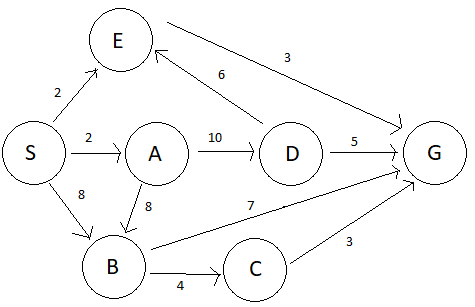

In [29]:
class SimpleGraph(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):
    moves = {
        'S':['move-A', 'move-B', 'move-E'],
        'A':['move-B', 'move-D'],
        'D':['move-G', 'move-E'],
        'B':['move-G', 'move-C'],
        'C':['move-G'],
        'E':['move-G']}
    return moves[node.state]        

  def result(self, node, action):
    new_state = {
            'move-A': 'A',
            'move-B': 'B',
            'move-C': 'C',
            'move-D': 'D',
            'move-E': 'E',
            'move-G': 'G',
            'move-S': 'S'
    }      
    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost = {
        ('S', 'A'): 2,
        ('S', 'B'): 8,
        ('S', 'E'): 2,
        ('A', 'B'): 8,
        ('A', 'D'): 10,
        ('D', 'G'): 5,
        ('D', 'E'): 6,
        ('B', 'G'): 7,
        ('B', 'C'): 4,
        ('C', 'G'): 3,
        ('E', 'G'): 3}
    return cost[(node.state, succesor.state)]

  def hNoAdmisible(self, node):
    heuristic = {
        'S':5,
        'A':20,
        'D':5,
        'B':7,
        'C':3,
        'E':3,
        'G':0}
    return heuristic[node.state]
  def hAdmisible(self, node):
    heuristic = {
        'S':5,
        'A':15, 
        'D':5,
        'B':7,
        'C':3,
        'E':3,
        'G':0}
    return heuristic[node.state]    
  def hConsistente(self, node):
    heuristic = {
        'S':5,
        'A':4,
        'D':5,
        'B':7,
        'C':3,
        'E':3,
        'G':0}
    return heuristic[node.state]

  def hNegativa(self, node):
    heuristic = {
        'S':-5,
        'A':-3,
        'D':-6,
        'B':-7,
        'C':-9,
        'E':-9,
        'G':0}
    return heuristic[node.state]


Asigne valores negativos a los valores de la heurísitca e intente encontrar la solución utilizando los algoritmos de A* y Voraz. ¿Qué ocurre?

UCS

In [30]:
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo de costo uniforme:')
solution = UCS(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))


Algoritmo de costo uniforme:
Action sequence: ['move-E', 'move-G']
State sequence: [S, E, G]
Cost: 5


VORAZ

In [31]:
simple_graph = SimpleGraph(Node('A'), Node('G'))

print('Algoritmo Voraz (heuristica no admisible):')
solution = VORAZnoAdmisible(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))

Algoritmo Voraz (heuristica no admisible):
Action sequence: ['move-D', 'move-G']
State sequence: [A, D, G]
Cost: 15


In [32]:
print('\nAlgoritmo Voraz (heuristica admisible):')
solution = VORAZadmisible(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))


Algoritmo Voraz (heuristica admisible):
Action sequence: ['move-D', 'move-G']
State sequence: [A, D, G]
Cost: 15


In [33]:
print('\nAlgoritmo Voraz (heuristica consistente):')
solution = VORAZconsistente(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))


Algoritmo Voraz (heuristica consistente):
Action sequence: ['move-D', 'move-G']
State sequence: [A, D, G]
Cost: 15


In [34]:
print('\nAlgoritmo Voraz (heuristica negativa):')
solution = VORAZnegativa(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))


Algoritmo Voraz (heuristica negativa):
Action sequence: ['move-B', 'move-G']
State sequence: [A, B, G]
Cost: 15


A*

In [35]:
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo Voraz con heuristica no admisible:')
solution = AAnoAdmisible(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))

Algoritmo Voraz con heuristica no admisible:
Action sequence: ['move-E', 'move-G']
State sequence: [S, E, G]
Cost: 5


In [36]:
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo Voraz con heuristica admisible:')
solution = AAadmisible(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))

Algoritmo Voraz con heuristica admisible:
Action sequence: ['move-E', 'move-G']
State sequence: [S, E, G]
Cost: 5


In [37]:
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo Voraz con heuristica consistente:')
solution = AAconsistente(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))

Algoritmo Voraz con heuristica consistente:
Action sequence: ['move-E', 'move-G']
State sequence: [S, E, G]
Cost: 5


In [38]:
simple_graph = SimpleGraph(Node('S'), Node('G'))

print('Algoritmo Voraz con heuristica negativa:')
solution = AAnegativa(simple_graph)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', simple_graph.g(solution))

Algoritmo Voraz con heuristica negativa:
Action sequence: ['move-E', 'move-G']
State sequence: [S, E, G]
Cost: 5


Conclusiones
* Como conclusiones observadas, se puede mencionar que por parte de las heuristicas nos ayudan a identificar la mejor via posible para llegar al estado objetivo. Usando diferentes heuristicas, donde más se puede variar el resultado es en el empleo del algoritmo voraz, pues sus resultados pueden variar por la ejecucion
* Ahora hablando de las heuristicas negativas, se mantiene la referencia de estructura, en los que los algoritmos voraz y a*, buscan siempre el de menor valor


## __2. (3.0 puntos) Un rompecabezas para niños__

El siguiente rompecabezas es un juego para niños en el cual las piezas solo pueden unirse en línea recta cambiándolas de lugar a través de tres operaciones permitidas por el juego. El objetivo es lograr una configuración como la que se presenta a continuación:

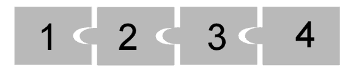

Las operaciones permitidas son:

* __D__: intercambiar dos piezas a la derecha
* __C__: intercambiar dos piezas en el centro
* __I__: intercambiar dos piezas en la izquierda

Por ejemplo, para el estado `[3|1|2|4]` tendríamos el siguiente árbol:

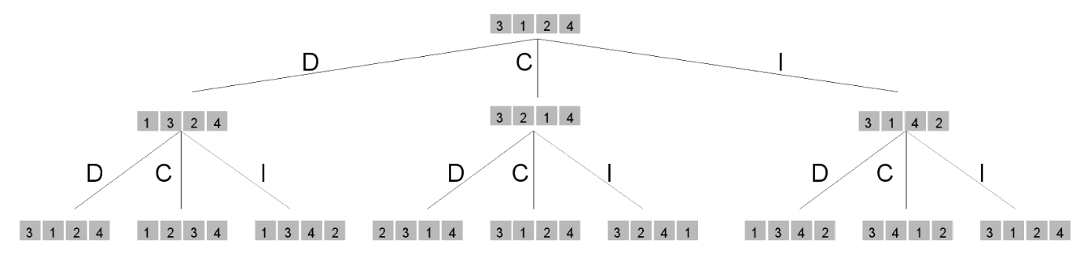

Con el ánimo de hacer el juego más interesante usted decide cambiar el costo de cada movimiento y propone las siguientes reglas: si la suma de los dos números en las fichas que desea mover es impar, el movimiento constará 2 puntos; si es par, constará 1 punto. El objetivo es completar el juego con la menor cantidad de puntos posibles. Encuentre la solución para este problema utilizando los algoritmos de UCS, Voraz y A* para el estado inicial `[3|4|2|1]`. Note que para implementar Voraz y A* es necesario proponer una heurística admisible.

In [39]:
#Funcion para conocer los posibles cambios de estado

def cambioo(s):
    a,b,c,d=s[0],s[1],s[2],s[3]
    I=b+a+c+d
    C=a+c+b+d
    D=a+b+d+c
    return [I,D,C]
    
#Funcion para saber el costo de realizar una accion
  #impar 2
  #par 1
def cost_T(s,ss):
    validacion=0
    for i in range(len(s)):
        if s[i] != ss[i]:
            validacion+=int(s[i])
    if validacion%2!=0:
        return 2
    else:
        return 1


In [40]:
class PUZZLE(SearchProblem):
  #'Simple Graph as a search problem'

  def actions(self, node):
    return cambioo(node.state)
  def result(self, node, action):
          
    new_node = Node(action, node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    
    cost = {
        (node.state, succesor.state): cost_T(node.state,succesor.state),
        }
    return cost[(node.state, succesor.state)]


# Definicion de la heuristica
# Esta es: la cantidad de fichas que se encuentran en una posicion errada 

  def h(self, node):
    mn=0
    for t in range(0,len(node.state)):
      if node.state[t] == self.goal.state[t]:
        mn+=1
    return int(mn/2)


## __UCS__

In [47]:
UCS_PROBLEM = PUZZLE(Node('3421'), Node('1234'))
print('Algoritmo de costo uniforme:')
solution = UCS2(UCS_PROBLEM)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', UCS_PROBLEM.g(solution))
#print('Expanded nodes:',expandidos_grafico[0])

Algoritmo de costo uniforme:
Action sequence: ['3241', '3214', '3124', '1324', '1234']
State sequence: [3421, 3241, 3214, 3124, 1324, 1234]
Cost: 8
Expanded nodes: 22


## _VORAZ_

In [42]:
VORAZ_PROBLEM = PUZZLE(Node('3421'), Node('1234'))
print('Algoritmo Voraz:')
solution = VORAZ2(VORAZ_PROBLEM)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', VORAZ_PROBLEM.g(solution))
#print('Expanded nodes:',expandidos_grafico[2])

Algoritmo Voraz:
Action sequence: ['3412', '3142', '1342', '1324', '1234']
State sequence: [3421, 3412, 3142, 1342, 1324, 1234]
Cost: 8


## _A*_

In [43]:
AA_PROBLEM = PUZZLE(Node('3421'), Node('1234'))
print('Algoritmo A*:')
solution = AA2(AA_PROBLEM)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', AA_PROBLEM.g(solution))
#print('Expanded nodes:',expandidos_grafico[2])

Algoritmo A*:
Action sequence: ['3241', '2341', '2314', '2134', '1234']
State sequence: [3421, 3241, 2341, 2314, 2134, 1234]
Cost: 8


Muestre un gráfico de barras donde compare la cantidad de nodos expandidos en los algoritmos de UCS, Voraz y A* para el estado inicial. ¿Los resultados son acordes a la teoría?

[20, 23, 22]


[Text(0, 0, 'UCS'), Text(0, 0, 'VORAZ'), Text(0, 0, 'A*')]

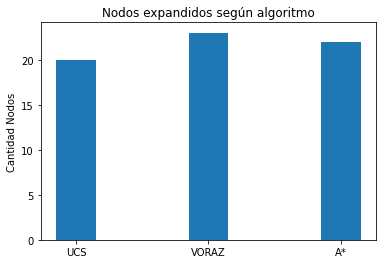

In [44]:
import numpy as np
import matplotlib.pyplot as plt
etiquetas=['UCS','VORAZ','A*']
fig, ax = plt.subplots()
co=np.arange(3)
print(expandidos_grafico)
ax.bar(co,expandidos_grafico[:3],0.30)
ax.set_title('Nodos expandidos según algoritmo')
ax.set_ylabel('Cantidad Nodos')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)

¿Los resultados son acordes a la teoría?

R: Se esperaria que A* fuera el que menos nodos debe expandir, pero quizá por la definición de la heuristica esta le implique realizar más pasos de los esperados. Tal y como se esperaba la ruta optima fue la misma en A* y UCS; mientras que el algoritmo voraz tomó una ruta diferente pero con un costo de igual magnitud.